# 파이토치 기본

## 자동미분

In [1]:
import torch
x = torch.ones(2,2, requires_grad=True) # trnsor에서 이뤄진 모든 연산들을 추적(track)하기 시작

y = x + 1
z = 2*y ** 2
r = z.mean()
print('Result : ', r)

Result :  tensor(8., grad_fn=<MeanBackward0>)


- y는 x에 대한 식, z는 y에 대한 식, r은 z에 관한 식으로, 이는 합성 함수 개념으로 r은 x에 대해 미분이 가능.

- 역으로 식을 써내려 가보자.

$$ res = \frac{z_1 + z_2 + z_3 + z_4}{4} $$

$$ z_i = {2y_i}^2$$

$$ z_i = 2{x_i+1}^2 $$

$$ \frac{dres}{dx_i} = x_i + 1$$

In [2]:
r.backward() # r을 기준으로 역전파를 진행한다.

print(x.grad) # 모든 x의 값이 1임으로 x.grad를 통해 나온 미분값은 모두 2
# x.grad는 backward()가 선언된 변수를 기준으로 미분을 한다.
# 즉, d(res)/dx를 계산한다.
# d(res)/dx_i = x_i + 1

tensor([[2., 2.],
        [2., 2.]])


## 역전파 선형회귀식

In [3]:
import matplotlib.pyplot as plt

In [4]:
torch.FloatTensor(range(5))

tensor([0., 1., 2., 3., 4.])

In [5]:
torch.FloatTensor(range(5)).unsqueeze(1) # 특정 위치에 1인 차원을 추가

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])

In [6]:
x = torch.FloatTensor(range(5)).unsqueeze(1)
y = 2 * x + torch.rand(5,1) # torch.rand(5,1) 정규분포 난수값으로 구성된 5 x 1 텐서 생성

In [7]:
x.shape

torch.Size([5, 1])

In [8]:
num_features = x.shape[1] # 특성의 수 저장

In [9]:
# 선형회귀를 연산하기 위해 w 가중치는 처음에 어떤 값?
w = torch.randn(num_features, 1, requires_grad=True)

# 선형식은 y=xw+b로 표현. 따라서 w는 5 x 1 데이터와 곱할 수 있어야 함
# 예측값이 1개로 나와야 함으로 크기가 1 (피처수) x 1 (출력값 크기)인 배열로 정의
b = torch.randn(1, requires_grad=True) # b는 모든 인스턴스에 동일한 숫자를 더해 주어야함으로 1인 텐서로 정의

In [10]:
w, b

(tensor([[-0.0483]], requires_grad=True), tensor([2.2227], requires_grad=True))

In [11]:
import torch.optim as optim

In [12]:
learning_rate = 1e-3
optimizer = optim.SGD([w,b], lr=learning_rate)
# torch의 옵티마이저는 torch.optim로 정의할 수 있다.
# torch.optim에서 제공하는 옵티마이저 종류 : https://pytorch.org/docs/stable/optim.html

In [13]:
print(w.shape, b.shape)

torch.Size([1, 1]) torch.Size([1])


In [14]:
loss_stack = []
for epoch in range(2001):
    optimizer.zero_grad() # 최적화는 계산을 누적시키기 때문에 매 에폭마다 값을 초기화 해야한다.

    y_hat = torch.matmul(x,w) + b # 회귀식 모델을 이용하여 예측값 산출
    loss = torch.mean((y_hat-y)**2) 

    loss.backward() # 역전파를 기준으로 손실함수로 정의
    optimizer.step() # 미리 정의한 optimizer를 이용해 최적화 시행
    loss_stack.append(loss.item()) # 손실함수 값만 저장. (item()을 사용하지 않으면 loss 텐서 전체를 저장)

    if epoch % 100 == 0:
        print(f'epoch : {epoch}, loss : {loss.item()}')

epoch : 0, loss : 13.980077743530273
epoch : 100, loss : 1.8714752197265625
epoch : 200, loss : 0.955660343170166
epoch : 300, loss : 0.8043729066848755
epoch : 400, loss : 0.7146226167678833
epoch : 500, loss : 0.6379693150520325
epoch : 600, loss : 0.5701457858085632
epoch : 700, loss : 0.5099695920944214
epoch : 800, loss : 0.45656734704971313
epoch : 900, loss : 0.40917593240737915
epoch : 1000, loss : 0.36711937189102173
epoch : 1100, loss : 0.32979607582092285
epoch : 1200, loss : 0.29667407274246216
epoch : 1300, loss : 0.26728013157844543
epoch : 1400, loss : 0.24119451642036438
epoch : 1500, loss : 0.21804504096508026
epoch : 1600, loss : 0.19750139117240906
epoch : 1700, loss : 0.17927029728889465
epoch : 1800, loss : 0.16309097409248352
epoch : 1900, loss : 0.1487327367067337
epoch : 2000, loss : 0.13599053025245667


In [15]:
with torch.no_grad(): # torch.no_grad()는 gradient 연산 옵션을 끔
    y_hat = torch.matmul(x,w) + b # 최종 학습된 w, b를 이용해 예측값 산출

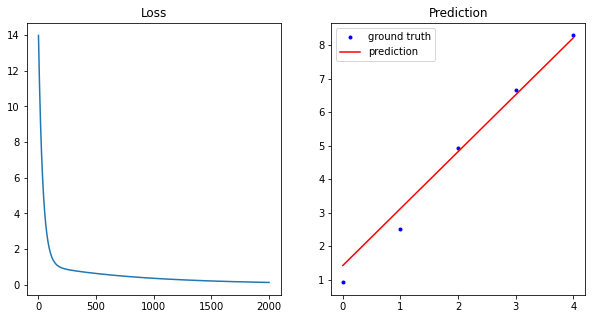

In [16]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title('Loss')
plt.subplot(122)
plt.plot(x, y, '.b')
plt.plot(x, y_hat, 'r-')
plt.legend(['ground truth', 'prediction'])
plt.title('Prediction')
plt.show()

## 데이터 불러오기 (DataLoader)

In [17]:
import torch # 파이토치 기본 라이브러리
import torchvision # 이미지 관련 된 파이토치 라이브러리
import torchvision.transforms as tr # 이미지 전처리 기능들을 제공하는 라이브러리
from torch.utils.data import DataLoader, Dataset # 데이터를 모델에 사용할 수 있도록 정리해 주는 라이브러리
import numpy as np # 넘파이 기본 라이브러리
import matplotlib.pyplot as plt

In [18]:
# 16x16으로 이미지 크기 변환 후 텐서 타입으로 변환
transf = tr.Compose([tr.Resize((16,16)), tr.ToTensor()])

In [19]:
# torchvision.datasets에서 제공하는 CIFAR10 데이터를 불러온다.
# root 에는 다운로드 받을 경로를 입력한다.
# train=True이면 학습 데이터를 불러오고 train=False이면 테스트 데이터를 불러온다.
# 미리 선언한 전처리를 사용하기 위해 transform=transf을 입력한다.

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transf)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transf)

Files already downloaded and verified
Files already downloaded and verified


In [20]:
# 일반적으로 데이터셋은 이미지와 라벨이 동시에 들어있는 튜플(tuple) 형태다. (이미지, 라벨)
# trainset[0]은 학습 데이터의 첫 번째 데이터로 이미지 한 장과 라벨 숫자 하나가 저장되어 있다.
# 즉, trainset[0][0]은 이미지이며, trainset[0][1]은 라벨이다.

print(trainset[0][0].size())

# 현재 이미지 사이즈는 3 x 16 x 16이다. 여기서 3은 채널 수를 말하고 16x16은 이미지의 너비와 높이를 의미한다.
# 일반적인 컬러 사진은 RGB 이미지이기 때문에 채널이 3개이고 (너비)x(높이)x(채널수)로 크기가 표현된다.
# 하지만 파이토치에서는 이미지 한장이 (채널 수)x(너비)x(높이)으로 표현되니 유의할 것

torch.Size([3, 16, 16])


In [21]:
# DataLoader는 데이터를 미니 배치 형태로 만들어 준다.
# 따라서 배치 사이즈 및 셔플 여부 등을 선택할 수 있다.
trainloader = DataLoader(trainset, batch_size=50, shuffle=True)
trestloader = DataLoader(testset, batch_size=50, shuffle=False)

In [22]:
# CIFAR10의 학습 이미지는 50,000장이고 batch_size는 50이다.
# 그러면 trainlodaer 1000개의 배치가 있을 것.
len(trainloader)

1000

In [23]:
trainloader

In [24]:
# iter, next를 이용해 일부 데이터를 확인 할 수 있다.
images, labels = iter(trainloader).next()
print(images.size())
# 일반적으로 학습 데이터는 4차원 형태로 모델에서 사용된다.
# (배치크기)x(채널 수)x(너비)x(높이)

torch.Size([50, 3, 16, 16])


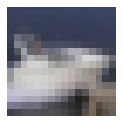

In [25]:
# permute(1,2,0)은 기존 차원의 위치인 0, 1,2 을 1,2,0으로 바꾸는 함수
# 즉 0번째 있던 채널값을 마지막으로 보낸다.
oneshot = images[1].permute(1,2,0).numpy()
plt.figure(figsize=(2,2))
plt.imshow(oneshot)
plt.axis('off')
plt.show()

## 데이터 라벨링
- 같은 클래스 별로 폴더를 정리한 경우

In [26]:
!pip install -U --no-cache-dir gdown --pre
print("Downloading...")
!gdown --id {"15T7aV6-iuPDGHijnNE6ZWxets4UyC6yx"} -O class.zip
!unzip *.zip
!rm *.zip

Downloading...
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=15T7aV6-iuPDGHijnNE6ZWxets4UyC6yx
To: /content/class.zip
100% 143k/143k [00:00<00:00, 98.4MB/s]
Archive:  class.zip
replace class/lion/dummy3.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: class/lion/dummy3.png   
replace class/lion/dummy2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: class/lion/dummy2.png   
replace class/lion/dummy4.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: class/lion/dummy4.png   
replace class/lion/dummy1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: class/lion/dummy1.png   
  inflating: class/tiger/dummy11.png  
  inflating: class/tiger/dummy10.png  
  inflating: class/tiger/dummy13.png  
  inflating: class/tiger/dummy1.png  
  

In [27]:
# 데이터가 같은 클래스 별로 미리 폴더를 정리 된 경우, ImageFolder의 1줄 선언으로 개인 데이터를 사용할 수 있다.
# 별도의 라벨링이 필요 없으며 폴더 별로 자동으로 라벨링을 한다.
# 다음으로 ImageFloder에 상위 폴더 ./class를 입력하면 이미지와 라벨이 정리 되어 데이터를 불러온다.

transf = tr.Compose([tr.Resize((128, 128)), tr.ToTensor()]) # 128x128 이미지 크기 변환 후 텐서로 만든다.
trainset = torchvision.datasets.ImageFolder(root='/content/class', transform=transf) # 커스텀 데이터를 불러온다.
trainloader = DataLoader(trainset, batch_size=2, shuffle=False) # 데이터를 미니 배치 형태로 만들어 준다

In [28]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size(), labels)

torch.Size([2, 3, 128, 128]) tensor([0, 0])


## Dataset 클래스를 활용한 라벨링

In [29]:
# 32x32 컬러 이미지와 라벨이 각각 100장이 있다고 가정하자.
train_images = np.random.randint(256, size=(100, 32, 32, 3))/255 # (이미지 수)x (너비) x (높이) x (채널 수)
train_labels = np.random.randint(2, size=(100, 1)) # 라벨 수

```python
from torch.utils.data import Dataset

class MyDataset(Dataset):

    def __init__(self):

    def __getitem__(self, index):

    def __len__(self):

```
이 양식을 통으로 가지고 다니자!

In [30]:
class TensorData(Dataset):
    def __init__(self, x_data, y_data):
        self.x_data = torch.FloatTensor(x_data) # 이미지 데이터를 FloatTensor로 변환
        self.x_data = self.x_data.permute(0, 3, 1, 2) # (이미지수)x(너비)x(높이)x(채널수) -> (배치크기)x(채널수)x(너비)x(높이)
        self.y_data = torch.LongTensor(y_data) # 라벨 데이터를 LongTensor로 변형
        self.len = self.y_data.shape[0] # 클래스 내의 들어 온 데이터 개수

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index] # 뽑아 낼 데이터를 적어준다.

    def __len__(self):
        return self.len


In [31]:
train_data = TensorData(train_images, train_labels) # 텐서 데이터 불러오기
train_loader = DataLoader(train_data, batch_size=10, shuffle=True) # 미니 배치 형태로 데이터 갖추기

## DataLoader 고급

In [32]:
train_images = np.random.randint(256, size=(100, 32, 32, 3))/255 # (이미지 수)x (너비) x (높이) x (채널 수)
train_labels = np.random.randint(2, size=(100, 1)) # 라벨 수

In [33]:
# 전처리 기술을 직접 만들어 보자.
# 이 때 위 기본 양식과 같이 사용하기 위해 call 함수를 사용한다.
# def __call__ 내의 원하는 전처리 작업을 프로그래밍 할 수 있다.

# 1. 텐서 변환
class ToTensor:
    def __call__(self, sample):
        inputs, labels = sample
        inputs = torch.FloatTensor(inputs) # 텐서로 변환
        inputs = inputs.permute(2,0,1) # 형태 변환 (채널x너비x높이)
        return inputs, torch.LongTensor(labels)  # 텐서로 변환

# 2. 선형식
class LinearTensor:
    def __init__(self, slope=1, bias=0):
        self.slope = slope
        self.bias = bias

    def __call__(self, sample):
        inputs, labels = sample
        inputs = self.slope*inputs + self.bias # ax+b 계산하기
        return inputs, labels


# 2. CutOut: 이미지 내부에 무작위로 사각형 영역을 선택하여 0으로 만드는 데이터 증식 방법    
class CutOut:
    
    def __init__(self, ratio=0.5):
        self.ratio = int(1/ratio) # ratio가 0.5이면 50%확률로 CutOut 발현
           
    def __call__(self, sample):
        inputs, labels = sample
        active = int(np.random.randint(0, self.ratio, 1)) # 0 또는 1을 반환 받음
        
        if active == 0:
            _, w, h = inputs.size() # .size()이미지의 너비와 높이를 받음, input의 크기는(채널, 너비, 높이)
            min_len = min(w, h) # 최소값 구하기
            box_size = int(min_len//4) # CutOut의 길이를 최소값의 1/4로 설정
            idx = int(np.random.randint(0, min_len-box_size, 1)) # idx를 통해 CutOut 박스 좌측 상단 꼭지점 위치를 지정
            inputs[:,idx:idx+box_size,idx:idx+box_size] = 0 # 해당 영역의 값을 0으로 대체
        
        return inputs, labels

In [34]:
class MyDataset(Dataset):
    def __init__(self, x_data, y_data, transform=None):
        self.x_data = x_data # 넘파이 배열이 들어온다.
        self.y_data = y_data # 넘파이 배열이 들어온다.
        self.transform = transform
        self.len = len(y_data)
        self.tensor = ToTensor()
    def __getitem__(self, index):
        sample = self.x_data[index], self.y_data[index]
        if self.transform:
            sample = self.transform(sample) #self.transform이 None이 아니라면 전처리를 작업한다.
        else:
            sample = self.tensor(sample)
        return sample 
    def __len__(self):
        return self.len            

In [35]:
trans = tr.Compose([ToTensor(),CutOut()]) 
dataset1 = MyDataset(train_images, train_labels, transform=trans)
train_loader1 = DataLoader(dataset1, batch_size=10, shuffle=True)
# ToTensor()와 tr.ToTensor()의 차이
# 앞 서 사용한 tr.ToTensor()는 import torchvision.transforms as tr를 이용한 파이토치 메소드를 이용한 것이고
# ToTensor()는 위에서 정의 된 메소드를 사용한 것이다.

### 이미지 전처리 결과

In [36]:
images1, labels1 = iter(train_loader1).next()
print(images1.size()) # 배치 및 이미지 크기 확인

torch.Size([10, 3, 32, 32])


In [37]:
def imshow(img):
    plt.figure(figsize=(10,100))
    plt.imshow(img.permute(1,2,0).numpy())
    plt.show()

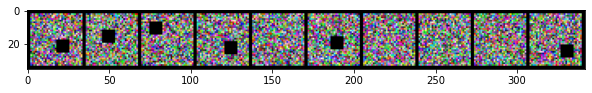

In [38]:
imshow(torchvision.utils.make_grid(images1,nrow=10))

### 파이토치 제공 전처리 사용

In [39]:
# torchvision.transforms에서 제공하는 전처리 기술을 사용한다.
# torchvision.transforms은 입력 이미지가 일반적으로 PILImage 타입이나 텐서일 경우에 동작한다.
# 현재 데이터는 넘파이 배열이다. 따라서 텐서 변환 후 tr.ToPILImage()을 이용하여 PILImage 타입으로 만들어 준다.
# __call__을 이용한 기본 구조는 동일하다.
class MyTransform:   
    def __call__(self, sample):
        inputs, labels = sample
        inputs = torch.FloatTensor(inputs)
        inputs = inputs.permute(2,0,1)
        labels = torch.FloatTensor(labels)

        transf = tr.Compose([tr.ToPILImage(), tr.Resize(128), tr.ToTensor()])
        final_output = transf(inputs)      
        
        return final_output, labels  

In [40]:
dataset2 = MyDataset(train_images,train_labels, transform=MyTransform())
train_loader2 = DataLoader(dataset2, batch_size=10, shuffle=True)

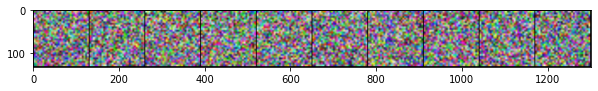

torch.Size([10, 3, 128, 128])


In [41]:
images2, labels2 = iter(train_loader2).next()
imshow(torchvision.utils.make_grid(images2,nrow=10))
print(images2.size()) # 배치 및 이미지 크기 확인

### 커스컴 전처리와 토치에서 제공하는 기본 전처리 같이 사용

In [42]:
class CutOut:
    
    def __init__(self, ratio=0.5):
        self.ratio = int(1/ratio) # ratio가 0.5이면 50%확률로 CutOut 발현
           
    def __call__(self, inputs):
        active = int(np.random.randint(0, self.ratio, 1)) # 0 또는 1을 반환 받음
        
        if active == 0:
            _, w, h = inputs.size() # .size()이미지의 너비와 높이를 받음, input의 크기는(채널, 너비, 높이)
            min_len = min(w, h) # 최소값 구하기
            box_size = int(min_len//4) # CutOut의 길이를 최소값의 1/4로 설정
            idx = int(np.random.randint(0, min_len-box_size, 1)) # idx를 통해 CutOut 박스 좌측 상단 꼭지점 위치를 지정
            inputs[:,idx:idx+box_size,idx:idx+box_size] = 0 # 해당 영역의 값을 0으로 대체
        
        return inputs

In [43]:
class MyDataset(Dataset):
    def __init__(self, x_data, y_data, transform=None):
        self.x_data = x_data # 넘파이 배열이 들어온다.
        self.y_data = y_data # 넘파이 배열이 들어온다.
        self.transform = transform
        self.len = len(y_data)
        self.tensor = ToTensor()

    def __getitem__(self, index):
        sample = self.x_data[index], self.y_data[index]
        if self.transform:
            sample = self.transform(sample) #self.transform이 None이 아니라면 전처리를 작업한다.
        else:
            sample = self.tensor(sample)
        return sample 
        
    def __len__(self):
        return self.len 

In [44]:
class MyTransform:   
    def __call__(self, sample):
        inputs, labels = sample
        inputs = torch.FloatTensor(inputs)
        inputs = inputs.permute(2,0,1)
        labels = torch.FloatTensor(labels)

        transf = tr.Compose([tr.ToPILImage(), tr.Resize(128), tr.ToTensor(), CutOut()])
        final_output = transf(inputs)      
        
        return final_output, labels  

In [45]:
dataset3 = MyDataset(train_images,train_labels, transform=MyTransform())
train_loader3 = DataLoader(dataset3, batch_size=10, shuffle=True)

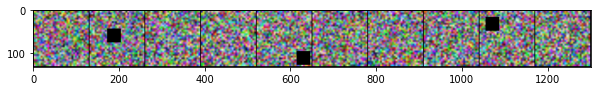

torch.Size([10, 3, 128, 128])


In [46]:
images3, labels3 = iter(train_loader3).next()
imshow(torchvision.utils.make_grid(images3,nrow=10))
print(images3.size()) # 배치 및 이미지 크기 확인

### CIFAR100 데이터와 커스텀 전처리 사용

In [47]:
transf = tr.Compose([tr.Resize(128), tr.ToTensor(), CutOut()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transf)

Files already downloaded and verified


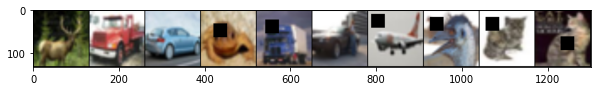

torch.Size([10, 3, 128, 128])


In [48]:
trainloader = DataLoader(trainset, batch_size=10, shuffle=True)
images, labels = iter(trainloader).next()
imshow(torchvision.utils.make_grid(images,nrow=10))
print(images.size()) # 배치 및 이미지 크기 확인